Please fill in your information and attach all the needed files in your final zip file uploaded.  
**Name: Mohammad Mozafari**  
**Student Number: 400201167**


# 0 Imports and Setups

In [1]:
import math
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
import scipy.stats as st

Set the last three digits of your student number as input to the function below:

In [3]:
np.random.seed(167) #replace 123 with the last three digits of your student number

In [8]:
# Matplotlib settings
plt.style.use(['dark_background'])
plt.rc('axes', facecolor='k')
plt.rc('figure', facecolor='k')


# 1 Estimation

# 1.1 Generating Random Samples

Assume that n i.i.d samples are drawn from an exponential distribution with the following PDF:  
$$\begin{aligned}f(x_i|\lambda) &= \lambda e^{-\lambda x_i}\end{aligned}$$
* For fixed $\lambda = 0.25$, generate random sequences of sizes 10, 100, 500, and 1000, and store them in seperate files named *exp_{size}.npy* attatched in your final zip file.
* Plot each of the sequqnces generated above.

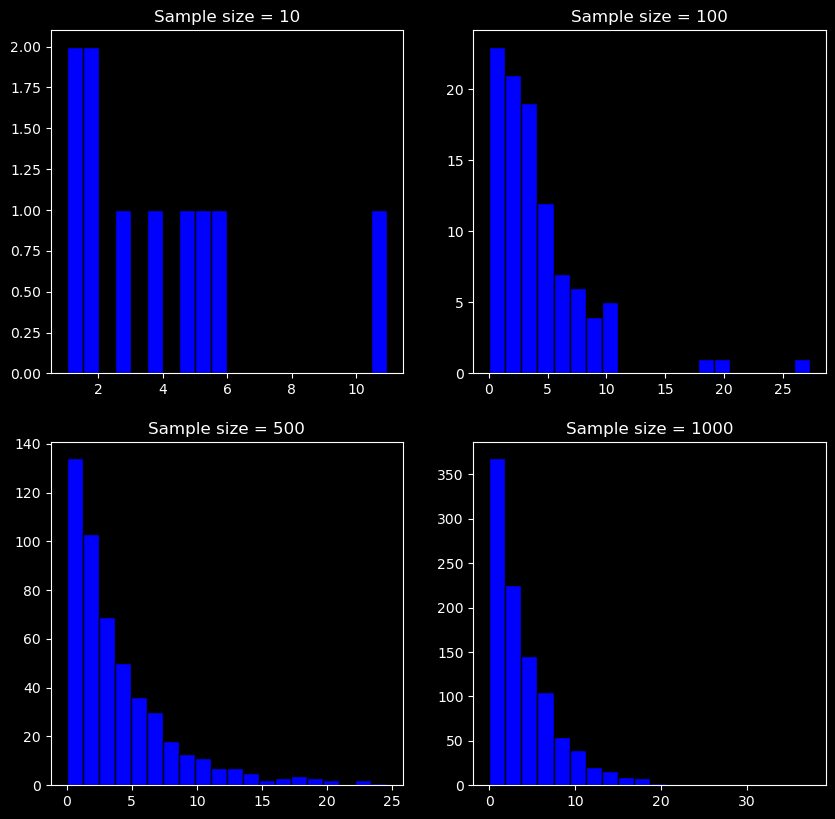

In [33]:
lam = 0.25
bins = 20
sample_sizes = [10, 100, 500, 1000]

plt.rc('figure', figsize=(10, 10), dpi=100)
fig, axes = plt.subplots(2, 2)
for i, sample_size in enumerate(sample_sizes):
    sample = np.random.exponential(1/lam, sample_size)
    np.save('exp_{}.npy'.format(sample_size), sample)
    axes[i // 2][i % 2].hist(sample, bins=bins, color='blue', lw=1, ec='black')
    axes[i // 2][i % 2].set_title('Sample size = {}'.format(sample_size))


# 1.2 MLE Estimation

* Find the log likelihood equation for the given distribution. Include your solution in your attached pdf file.
* Suppose we have 40 candidates for $\lambda$ which are in the following form:
$$\begin{aligned}\lambda_{candidate} = 0.025i, (1\leq i\leq 40)\end{aligned}$$
Calculate and plot the log likelihood values for the candidates of $\lambda$ for each of the four sequences generated in secion 1.1.
* Find the MLE estimator and include it in your solution. Also find the best estimator of $\lambda$ from the log likelihood values of the previous part for each of the four sequences generated in secion 1.1.

MLE for sample size = 10: 0.2540841401105246
MLE for sample size = 100: 0.23560277596397763
MLE for sample size = 500: 0.24618837224964024
MLE for sample size = 1000: 0.24432900465191437


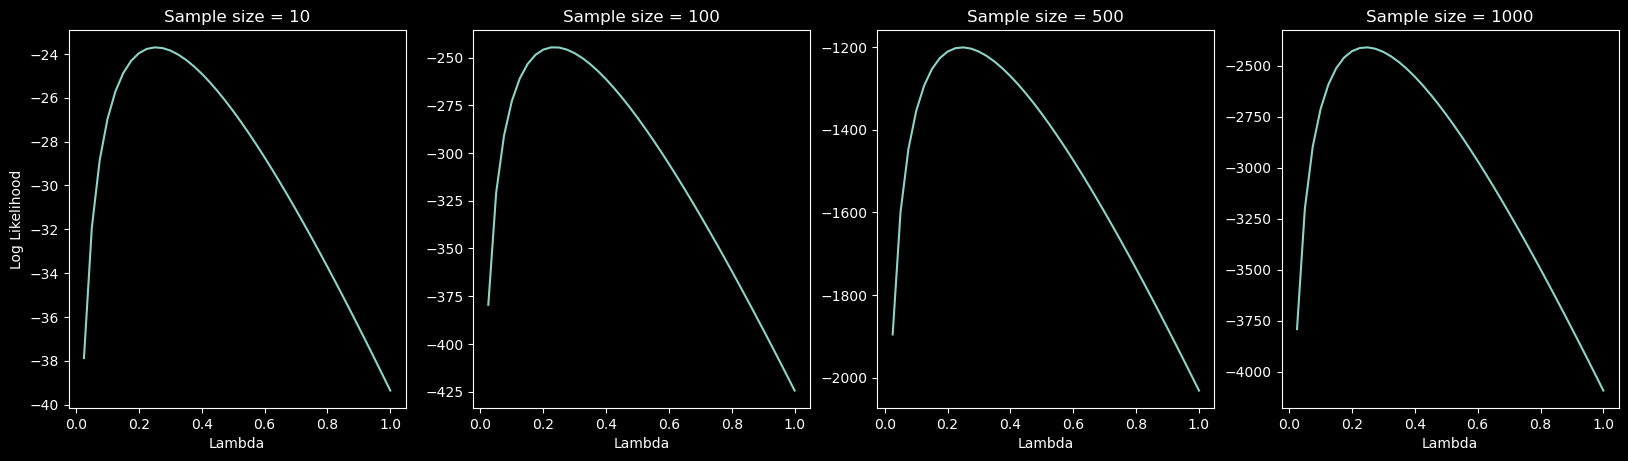

In [48]:
files = ['exp_10.npy', 'exp_100.npy', 'exp_500.npy', 'exp_1000.npy']
MLEs = []

plt.rc('figure', figsize=(20, 5), dpi=100)
fig, axes = plt.subplots(1, 4)
lambdas = 0.025 * np.arange(1, 41)
for i, f in enumerate(files):
    sample = np.load(f)
    ll = np.log(lambdas) * sample.shape[0] - lambdas * sample.sum()
    axes[i].plot(lambdas, ll)
    axes[i].set_title('Sample size = {}'.format(sample.shape[0]))
    axes[i].set_xlabel('Lambda')
    if i == 0:
        axes[i].set_ylabel('Log Likelihood')
    
    print('MLE for sample size = {}: {}'.format(sample.shape[0], 1/np.mean(sample)))

# 1.3 MAP Estimation

Gamma distrutione with the shape $k$ and the scale $\theta$, noted by $G(k, \theta)$, has the following PDF function:
$$\begin{aligned} f(x| k, \theta) = \frac{1}{\Gamma(k)\theta^{k}}x^{k - 1} e^{-\frac{x}\theta} \end{aligned},$$
where for any integer n:
$$\begin{aligned}\Gamma(n) = (n-1)!\end{aligned}$$
* Suppose that the parameter $\lambda$ of the exponential distribution is itself originated from the gamma distribution $G(2, 0.5)$. Plot the prior probabilities for the candidates of $\lambda$ introduced in section 1.2, given this prior distribution.
* Find the posterior distribution. Include your solution in your attatched pdf file.
* Plot the posterior distribution for the candidates of $\lambda$ for each of the four sequences generated in secion 1.1.
* Find the MAP estimator and include it in your solution. Also find the best MAP estimator of $\lambda$ using the probabilities obtained for the posterior distribution for each of the four sequences generated in secion 1.1.

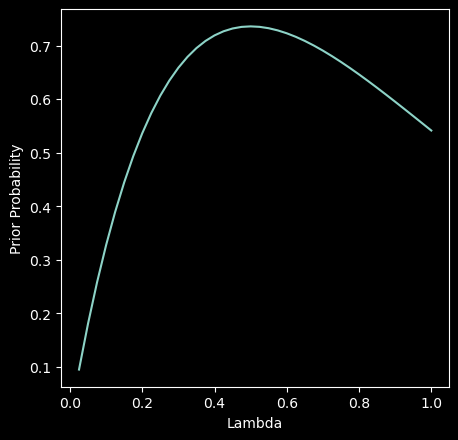

MAP for sample size = 10: 0.26597647341416353
MAP for sample size = 100: 0.23684278736023506
MAP for sample size = 500: 0.24643806824661155
MAP for sample size = 1000: 0.24445387931053578


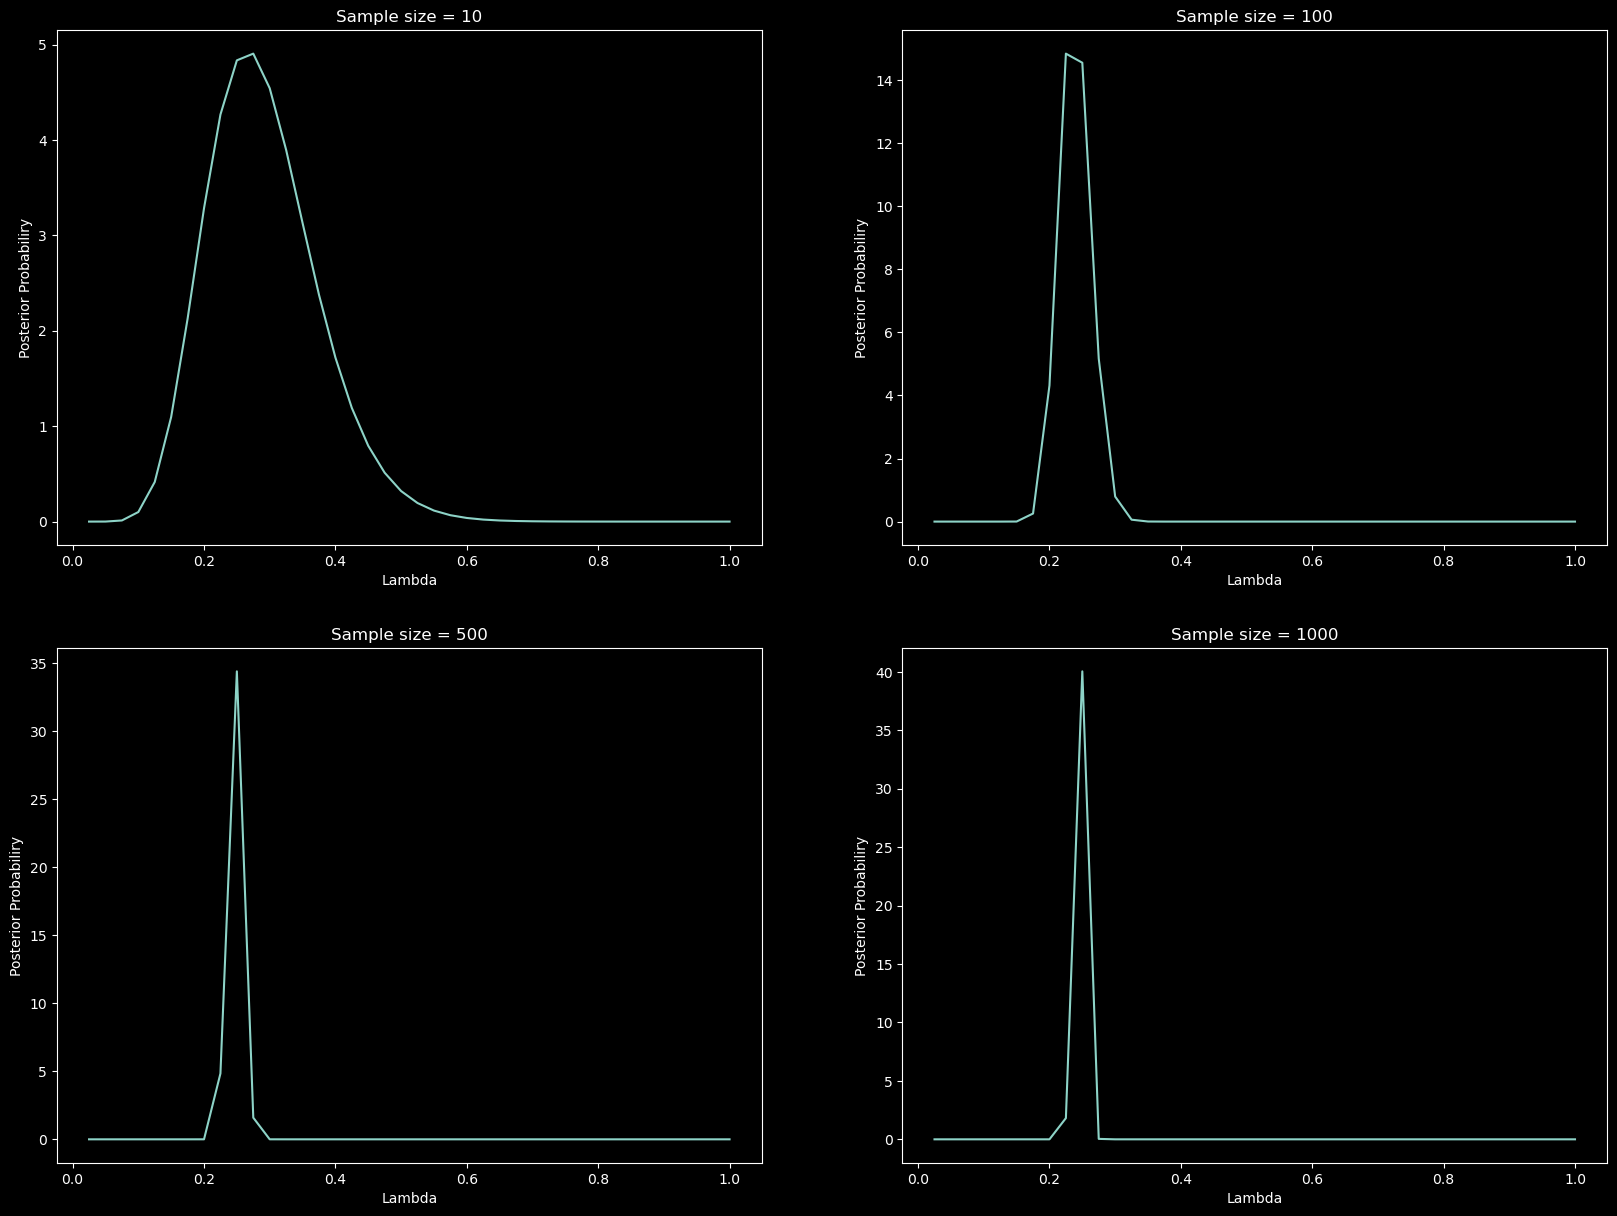

In [67]:
# parameters
k, theta = 2, 0.5
lambdas = 0.025 * np.arange(1, 41)

# compute prior probs
gamma_pdf = st.gamma(k, scale=theta, loc=0)
priors = gamma_pdf.pdf(lambdas)

# plot lambda against prior probs
plt.rc('figure', figsize=(5, 5), dpi=100)
plt.plot(lambdas, priors)
plt.xlabel('Lambda')
plt.ylabel('Prior Probability')
plt.show()

# plot posterior distribution
plt.rc('figure', figsize=(20, 15), dpi=100)
fig, axes = plt.subplots(2, 2)
for i, f in enumerate(files):
    sample = np.load(f)
    k = sample.shape[0] + 2
    theta = 1 / (2 + sample.sum())
    gamma_pdf = st.gamma(k, scale=theta, loc=0)
    posterior = gamma_pdf.pdf(lambdas)
    axes[i // 2][i % 2].plot(lambdas, posterior)
    axes[i // 2][i % 2].set_title('Sample size = {}'.format(sample.shape[0]))
    axes[i // 2][i % 2].set_xlabel('Lambda')
    axes[i // 2][i % 2].set_ylabel('Posterior Probabiliry')

    MAP = theta * (k-1)
    print('MAP for sample size = {}: {}'.format(sample.shape[0], MAP))


# 1.4 Conclusion and Analysis

Include your answers of the below questions in your attatched pdf file or in the cell below:
* Compare the MAP and MLE estimators in the previous sections for the given different four sequqnces.
* Compare the difference of the two estimators with the actual parameter ($\lambda = 0.25$) with respect to the number of samples in each sequence. 
* Based on the results from part 1.2 and 1.3, conclude about the relation between these two estimators, as the number of samples increases.

In [ ]:
#TODO

# 2 Hypothesis Testing

In this section, you are supposed to implement functions for performing Z-test and p-test. **You are not allowed to use the ready package implementations of these test functions.** Still, you may use built-in functions for  converting standard normal distribution probablities to areas under the normal curve and vice versa.

# 2.1 Function Implementation

Implement the hypothesis_test function. You are supposed to implement it as the function described in the cell below. Description, inputs, and output are provided in the cell below.

In [ ]:
def z_test(samples, hypothesis_mean, true_variance, alpha, condition):
    """
    Description:
    The function applies hypothesis testing z_test on the collected samples given a null hypothesis.
    
    Inputs:
    samples -> collected data samples to be tested
    hypothesis_mean -> the mean value being tested
    true_variance -> the actual variance of the samples (given in advance)
    alpha -> level of significance of the test
    condition -> one of the following string values: "eq", "gte", "lte" specifying the condition on the hypothesis mean
                      "eq": if the whole population mean is equal to the hypothesis mean.
                      "gte": if the whole population mean is greater than or equal to the hypothesis mean.
                      "lte": if the whole population mean is less than or equal to the hypothesis mean.
    
    Outputs:
    True if the null hypothesis is not rejected under the z_test with the specified conditions, False otherwise
    """
    #TODO

In [ ]:
def p_test(samples, hypothesis_mean, true_variance, alpha, rejection_side):
    """
    Description:
    The function applies hypothesis testing p_test on the collected samples given a null hypothesis.
    
    Inputs:
    samples -> collected data samples to be tested
    hypothesis_mean -> the mean value being tested
    true_variance -> the actual variance of the samples (given in advance)
    alpha -> level of significance of the test
    condition -> one of the following string values: "eq", "gte", "lte" specifying the condition on the hypothesis mean
                      "eq": if the whole population mean is equal to the hypothesis mean.
                      "gte": if the whole population mean is greater than or equal to the hypothesis mean.
                      "lte": if the whole population mean is less than or equal to the hypothesis mean.
    Outputs:
    True if the null hypothesis is not rejected under the p_test with the specified conditions, False otherwise
    """
    #TODO

# 2.2 Applying the Tests

In the cell below, load the samples given to you. Samples are provided in the attatched file **samples.npy**.    
**Suppose the true variance for the sample space is 9. ($\sigma^2=9$)**

In [ ]:
#TODO

Examine the following hypotheses on the data using **z_test**, seperately with $\alpha=0.05$ and $\alpha=0.01$:
* The mean of the whole population is 8.2.
* The mean of the whole population is at most 10.
* The mean of the whole population is at least 9.2


In [ ]:
#TODO

Examine the following hypotheses on the data using **p_test**, seperately with $\alpha=0.05$ and $\alpha=0.01$:

* The mean of the whole population is 8.8.
* The mean of the whole population is at most 9.
* The mean of the whole population is at least 8.4.

In [ ]:
#TODO

# 2.3 Conclusion and Analysis

Overally, conclude about the probable value ranges for the mean of the whole population using the results from the previous part. Include your answers in your attatched pdf file or in the cell below.

In [ ]:
#TODO